In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv("Loan_Data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.shape

(614, 13)

In [9]:
df["Loan_Status"]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
df['Gender']=df['Gender'].map({'Male':2, 'Female':1})

In [13]:
df["Gender"]=df["Gender"].fillna(0)

In [14]:
df["Gender"].unique()

array([2., 1., 0.])

In [15]:
df["Gender"]=df["Gender"].astype(int)

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
df['Married']=df['Married'].map({"No":0,"Yes":1}).fillna(0)

In [19]:
df['Married'].unique()

array([0., 1.])

In [20]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [21]:
df['Dependents']=df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3, 'NaN':0}).fillna(0)

In [22]:
df['Dependents'].unique()

array([0., 1., 2., 3.])

In [23]:
df['Dependents']=df['Dependents'].astype(int)

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,2,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,2,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,2,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,2,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [26]:
df["Education"]=df["Education"].map({'Graduate':1, 'Not Graduate':0})

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,2,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,2,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,2,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,2,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [29]:
df["Self_Employed"]=df["Self_Employed"].map({'No':0, 'Yes':1}).fillna(0)

In [30]:
df["Self_Employed"]=df["Self_Employed"].astype(int)

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,2,1.0,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,2,1.0,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,2,1.0,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,2,0.0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
df["LoanAmount"].dtype

dtype('float64')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

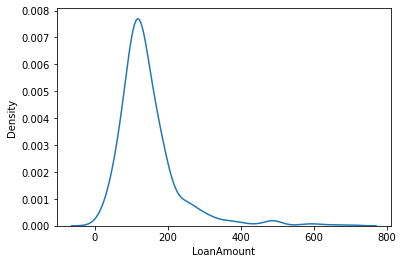

In [34]:
sns.kdeplot(df["LoanAmount"])

In [35]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

In [36]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int32(3), int64(2), object(3)
memory usage: 55.3+ KB


In [38]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [39]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(180)

In [41]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype(int)

In [43]:
df["Loan_Amount_Term"].unique()

array([360, 120, 240, 180,  60, 300, 480,  36,  84,  12])

In [44]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [45]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [46]:
df["Credit_History"]=df["Credit_History"].fillna(0)

In [47]:
df["Credit_History"]=df["Credit_History"].astype(int)

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,0,5849,0.0,128.0,360,1,Urban,Y
1,LP001003,2,1.0,1,1,0,4583,1508.0,128.0,360,1,Rural,N
2,LP001005,2,1.0,0,1,1,3000,0.0,66.0,360,1,Urban,Y
3,LP001006,2,1.0,0,0,0,2583,2358.0,120.0,360,1,Urban,Y
4,LP001008,2,0.0,0,1,0,6000,0.0,141.0,360,1,Urban,Y


In [49]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [50]:
df["Property_Area"]=df["Property_Area"].map({"Urban":1,"Rural":2,"Semiurban":3})

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,0,5849,0.0,128.0,360,1,1,Y
1,LP001003,2,1.0,1,1,0,4583,1508.0,128.0,360,1,2,N
2,LP001005,2,1.0,0,1,1,3000,0.0,66.0,360,1,1,Y
3,LP001006,2,1.0,0,0,0,2583,2358.0,120.0,360,1,1,Y
4,LP001008,2,0.0,0,1,0,6000,0.0,141.0,360,1,1,Y


In [52]:
del(df["Loan_ID"])

In [53]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,0.0,0,1,0,5849,0.0,128.0,360,1,1,Y
1,2,1.0,1,1,0,4583,1508.0,128.0,360,1,2,N
2,2,1.0,0,1,1,3000,0.0,66.0,360,1,1,Y
3,2,1.0,0,0,0,2583,2358.0,120.0,360,1,1,Y
4,2,0.0,0,1,0,6000,0.0,141.0,360,1,1,Y


In [54]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Loan_Status"]=encoder.fit_transform(df["Loan_Status"])

In [55]:
df["Loan_Status"]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [56]:
df.to_csv("Clean_Loan_Data.csv",index=False)

# New Clean Dataset 

In [57]:
df1=pd.read_csv("Clean_Loan_Data.csv")

In [58]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,0.0,0,1,0,5849,0.0,128.0,360,1,1,1
1,2,1.0,1,1,0,4583,1508.0,128.0,360,1,2,0
2,2,1.0,0,1,1,3000,0.0,66.0,360,1,1,1
3,2,1.0,0,0,0,2583,2358.0,120.0,360,1,1,1
4,2,0.0,0,1,0,6000,0.0,141.0,360,1,1,1


In [59]:
X=df1.drop("Loan_Status",axis=1)

In [60]:
y=df1["Loan_Status"].values

In [61]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape,y_train.shape

((491, 11), (491,))

In [64]:
X_test.shape,y_test.shape

((123, 11), (123,))

In [65]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,2,1.0,0,1,0,9083,0.0,228.0,360,1,3
377,2,1.0,0,1,0,4310,0.0,130.0,360,0,3
163,2,1.0,2,1,0,4167,1447.0,158.0,360,1,2
609,1,0.0,0,1,0,2900,0.0,71.0,360,1,2
132,2,0.0,0,1,0,2718,0.0,70.0,360,1,3
...,...,...,...,...,...,...,...,...,...,...,...
231,2,1.0,0,1,0,3716,0.0,42.0,180,1,2
312,1,0.0,0,1,0,2507,0.0,56.0,360,1,2
248,2,1.0,1,1,0,2882,1843.0,123.0,480,1,3
11,2,1.0,2,1,0,2500,1840.0,109.0,360,1,1


In [66]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
X_train_sc=Sc.fit_transform(X_train)
X_test_sc=Sc.transform(X_test)

In [67]:
pd.DataFrame(X_test_sc)

,0,1,2,3,4,5,6,7,8,9,10
0,0.496450,0.760775,-0.723275,0.534173,-0.397516,0.604085,-0.528127,0.926826,0.331727,0.537321,1.110544
1,0.496450,0.760775,-0.723275,0.534173,-0.397516,-0.201226,-0.528127,-0.209201,0.331727,-1.861085,1.110544
2,0.496450,0.760775,1.260681,0.534173,-0.397516,-0.225353,-0.072293,0.115378,0.331727,0.537321,-0.077424
3,-1.586941,-1.314450,-0.723275,0.534173,-0.397516,-0.439124,-0.528127,-0.893136,0.331727,0.537321,-0.077424
4,0.496450,-1.314450,-0.723275,0.534173,-0.397516,-0.469831,-0.528127,-0.904728,0.331727,0.537321,1.110544
...,...,...,...,...,...,...,...,...,...,...,...
118,0.496450,0.760775,-0.723275,0.534173,-0.397516,-0.301447,-0.528127,-1.229307,-2.194817,0.537321,-0.077424
119,-1.586941,-1.314450,-0.723275,0.534173,-0.397516,-0.505432,-0.528127,-1.067017,0.331727,0.537321,-0.077424
120,0.496450,0.760775,0.268703,0.534173,-0.397516,-0.442161,0.052454,-0.290346,2.016089,0.537321,1.110544
121,0.496450,0.760775,1.260681,0.534173,-0.397516,-0.506613,0.051509,-0.452635,0.331727,0.537321,-1.265391


In [68]:
X_test_sc[0]

array([ 0.49644953,  0.76077469, -0.72327513,  0.53417255, -0.39751587,
        0.60408483, -0.52812706,  0.92682589,  0.33172682,  0.53732105,
        1.11054382])

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_sc,y_train)

KNeighborsRegressor(n_neighbors=1)

In [70]:
y_pred = knn.predict(X_test_sc)
print(y_pred)

[1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0.]


In [71]:
X_test_sc[0]

array([ 0.49644953,  0.76077469, -0.72327513,  0.53417255, -0.39751587,
        0.60408483, -0.52812706,  0.92682589,  0.33172682,  0.53732105,
        1.11054382])

In [72]:
y_pred = knn.predict(X_test_sc)[0]
print(y_pred)

1.0


In [73]:
import pickle
pickle.dump(Sc,open('Sc.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [74]:
model=pickle.load(open("knn.pkl","rb"))

In [75]:
result=model.predict(X_test_sc)[10]

In [76]:
if result==1:
    print("Loan Is Approved")
else:
    print("Loan Is Not Aproved")

Loan Is Not Aproved


In [77]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')